<a href="https://colab.research.google.com/github/rohan181/house-price-prediction-using-machine-learning/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First I have imported the dataset and check if there is any null value or not .Than I have find the correlation .Than devide the data set into two  part one is input another one is target value.For target value column is house 'price per unit'.For input value all the column except age than I have scaled all the input value.Than I have split the train and test by 80:20  ratio.I have choosen lineer regression,random forest for training.Than I have find out mse and r^2 for evaluation 

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [50]:
df = pd.read_csv("/content/T1_2022_RE.csv")

In [52]:
print(df.shape)

(414, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    414 non-null    int64  
 1   trade_date            414 non-null    float64
 2   age                   414 non-null    float64
 3   distance_to_MTR       414 non-null    float64
 4   number_of_stores      414 non-null    int64  
 5   latitude              414 non-null    float64
 6   longitude             414 non-null    float64
 7   house_price_per_unit  414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
trade_date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
distance_to_MTR,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
number_of_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
house_price_per_unit,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


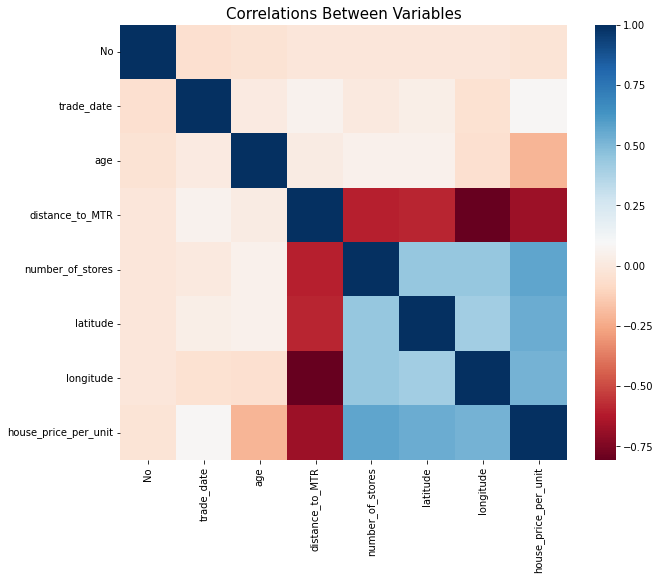

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [8]:
df.corr()

,No,trade_date,age,distance_to_MTR,number_of_stores,latitude,longitude,house_price_per_unit
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
trade_date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_MTR,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_of_stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price_per_unit,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


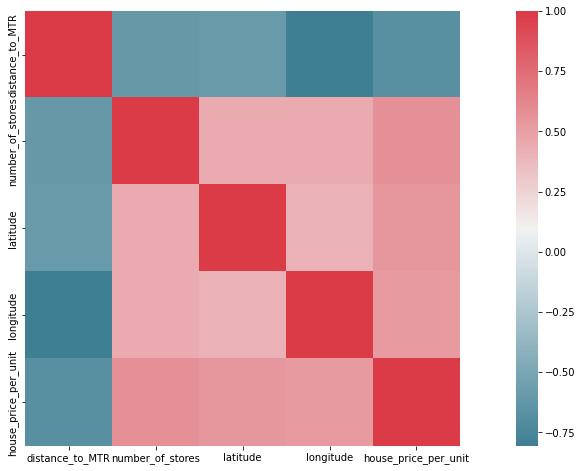

In [17]:
f, ax = plt.subplots(figsize=(20, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [31]:
important_num_cols = list(df.corr()["house_price_per_unit"][(df.corr()["house_price_per_unit"]>0.50) | (df.corr()["house_price_per_unit"]<-0.50)].index)
#cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols

df = df[important_cols]

In [12]:
df

,distance_to_MTR,number_of_stores,latitude,longitude,house_price_per_unit
0,84.87882,10,24.98298,121.54024,37.9
1,306.59470,9,24.98034,121.53951,42.2
2,561.98450,5,24.98746,121.54391,47.3
3,561.98450,5,24.98746,121.54391,54.8
4,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...
409,4082.01500,0,24.94155,121.50381,15.4
410,90.45606,9,24.97433,121.54310,50.0
411,390.96960,7,24.97923,121.53986,40.6
412,104.81010,5,24.96674,121.54067,52.5


In [32]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
distance_to_MTR         0
number_of_stores        0
latitude                0
longitude               0
house_price_per_unit    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [33]:
X = df.drop("house_price_per_unit", axis=1)
y = df["house_price_per_unit"]

In [26]:
X

,distance_to_MTR,number_of_stores,latitude,longitude
0,84.87882,10,24.98298,121.54024
1,306.59470,9,24.98034,121.53951
2,561.98450,5,24.98746,121.54391
3,561.98450,5,24.98746,121.54391
4,390.56840,5,24.97937,121.54245
...,...,...,...,...
409,4082.01500,0,24.94155,121.50381
410,90.45606,9,24.97433,121.54310
411,390.96960,7,24.97923,121.53986
412,104.81010,5,24.96674,121.54067


In [35]:
important_num_cols.remove("house_price_per_unit")

X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [36]:
X.head()

,distance_to_MTR,number_of_stores,latitude,longitude
0,-0.792495,2.007407,1.125430,0.448762
1,-0.616612,1.667503,0.912444,0.401139
2,-0.414015,0.307885,1.486860,0.688183
3,-0.414015,0.307885,1.486860,0.688183
4,-0.549997,0.307885,0.834188,0.592937


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [39]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6.2435501731549135
MSE: 63.90493104708975
RMSE: 7.994055982233909
R2 Score: 0.6190687388691392
------------------------------
RMSE Cross-Validation: 9.332443475136262


In [41]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 3.9761285550460226
MSE: 33.26597172493238
RMSE: 5.7676660552542725
R2 Score: 0.8017046829675104
------------------------------
RMSE Cross-Validation: 7.512541010537996


In [43]:
models.sort_values(by="MSE")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
1,RandomForestRegressor,3.976129,33.265972,5.767666,0.801705,7.512541
0,LinearRegression,6.243550,63.904931,7.994056,0.619069,9.332443


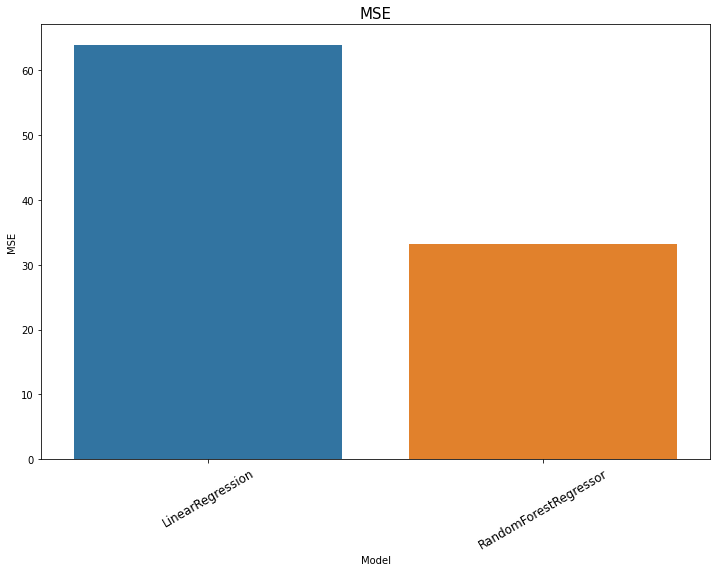

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MSE"])
plt.title("MSE", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

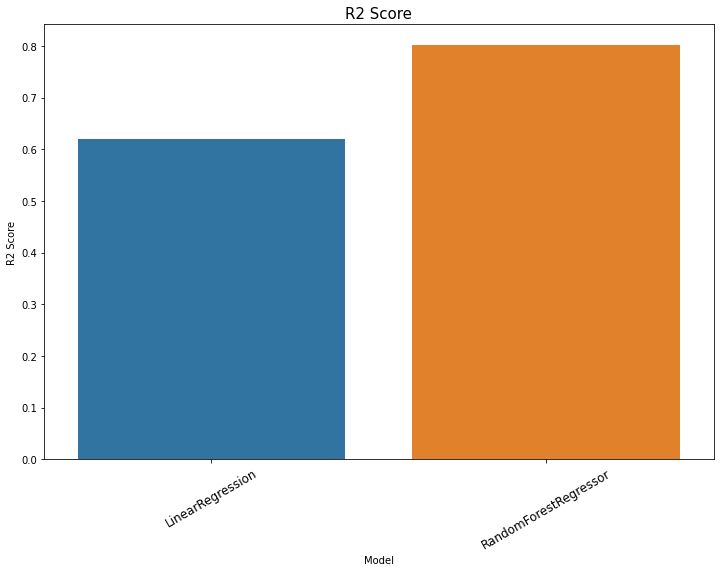

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["R2 Score"])
plt.title("R2 Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

After getting correlation value I have find out that age correlation value is very low and it is -.21 .Compare to other feature except data it is vary low that is why we have excluded for training